<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg"  width=400 height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h3 style="text-align: center;"><b> Градиентный спуск. Линейные модели.</b></h3>

В этом ноутбуке мы попробуем реализовать свой градиентный спуск на основе модели линейной регрессии и сравним свою реализацию с 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

### Построение модели

Модель нашей линейной решрессии:

In [2]:
def build_biased_X(X):
    """
    Добавляет к признакам фиктивную размерность, чтобы было удобнее находить bias
    """
    
    return np.append(np.ones((X.shape[0], 1)), X, axis = 1)

def mse(preds, y):
    """
    Возвращает среднеквадратичную ошибку между preds и y.
    """

    return ((preds - y)**2).mean()

def solve_weights(X, y):
    """
    Находит параметры W,b по методу наименьших квадратов для X и y.
    Решает систему линейных уравнений, к которым приводит метод наименьших 
    квадратов, для признаков X и значений y.
    """

    X_b = build_biased_X(X)
    
    # используем формулу из метода наименьших квадратов
    W = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return W
    
def grad_descent(X, y, lr, num_iter=100):
    """
    Находит приближенные значения параметров модели, используя градиентный спуск.
    Функции потерь (ошибки) для данной реализации спуска - сумма квадратов ошибки.
    Возвращаемое значение - список значений ффункции потерь на каждом шаге.
    """
    
    W = np.random.rand(X.shape[1] + 1)
    X_b = build_biased_X(X)
    
    losses = []
    
    for iter_num in range(num_iter):
        preds = predict_step(X_b, W)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        for sample, prediction, label in zip(X_b, preds, y):
            w_grad += 2 * (prediction - label) * sample
            
        W -= lr * w_grad
    return W,losses

def predict_step(X_b, W):
    """
    Предсказывает значения y, используя текущие параметры модели W и b
    """
    return np.squeeze(X_b@W.T)

def predict(X, W):
    """
    Предсказывает значения y, используя текущие параметры модели W и b
    """
    return predict_step(build_biased_X(X), W)

Подробнее рассмотрим формулы, которые используются в градиентном спуске.
Наша функция потерь 
$$L(\hat{y}) = \sum_{i = 1}^{N}( \hat{y}_{i} - y_{i} )^{2}$$
Найдем производную:
$$\frac{dL(\hat{y})}{d\hat{y}} = \sum_{i = 1}^{N}2(\hat{y}_{i} - y_{i} )$$
Где $\hat{y}$ это вектор предсказаний, а $y$ - вектор значений. Если у нас есть только два признака, то по определению нашей модели:
$$\hat{y}_{i} = W_1 * x_{i1} + W_2 * x_{i2} + b$$

Подставим в формулу для функции потерь и возьмём производную:
$$\frac{\partial L(\hat{y})}{ \partial W_1} = \sum_{i = 1}^{N} \frac{\partial (( \hat{y}_{i} - y_{i} )^{2})}{\partial \hat{y_i}} \times \frac{\partial \hat{y_i}}{\partial W_1}  =  
\sum_{i = 1}^{N} 2 (\hat{y_i} - y) \times x_{i1} $$


В формуле есть суммирование по всем строчкам $X$ ($x_i$ это $i$-ая строчка X, в которой хранятся признаки для $i$-го наблюдения), в коде ему соответствует внешний цикл, итерирующийся по всем наблюдениям. Внутренний цикл нужен для получения производных по всем весам $W_i$, которых в общем случае может быть произвольное количество.


В итоге выполнения кода 
$$w\_grad = (\frac{\partial L(\hat{y})}{\partial W_1} , \frac{\partial L(\hat{y})}{\partial W_2}, \frac{\partial L(\hat{y})}{\partial W_3} ,...) = \nabla L$$ 

Для обновления весов мы вычитаем градиент, передвигаясь в направлении скорейшего убывания функции.
$$W = W - lr \cdot \nabla L$$

### Получение данных

In [3]:
def generate_data(range_, a, b, std, num_points=100):
    """Генерирует данные в заданном промежутке, которые подчиняются зависимости y = a*x + b + е,
    где е - нормально распределено со стандартным отклонением std и нулевым средним."""
    X_train = np.random.random(num_points) * (range_[1] - range_[0]) + range_[0]
    y_train = a * X_train + b + np.random.normal(0, std, size=X_train.shape)
    
    return X_train, y_train

In [4]:
# Зададим параметры для искусственных данных
real_a = 0.34
real_b = 13.7
real_std = 7

# Генерируем данные для промежутка от 0 до 150 с параметрами, которые мы задали выше
X_train, y_train = generate_data([0, 150], real_a, real_b, real_std)
X_train_column = X_train.reshape(-1, 1)

# просто выведем табличку с данными
pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,138.067124,69.571596
1,43.694549,23.264862
2,25.624940,22.828402
3,147.789230,52.558998
4,91.893358,46.428133


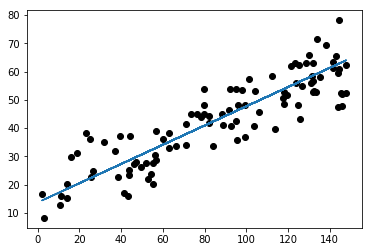

In [5]:
plt.scatter(X_train, y_train, c='black')
plt.plot(X_train, real_a*X_train+real_b)
plt.show()

### Решение с помощью линейной алгебры

In [6]:
# Используем функцию, написанную выше, чтобы найти W и b, с помощтю метода наименьших квадратов
W = solve_weights(X_train_column, y_train)
W

array([15.5735972 ,  0.31486764])

Полученные веса очень похожи на те, которые мы задавали при генерации данных. Значит модель получилась хорошей.

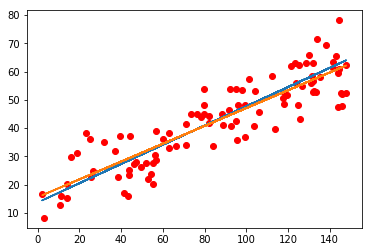

In [7]:
# Выведем данные, истинную зависимость и полученную нами с помощью метода наименьших квадратов
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, real_a*X_train+real_b)
plt.plot(X_train, np.squeeze(build_biased_X(X_train_column) @ W.T))
plt.show()

### Решение с помощью градиентного спуска

In [8]:
# Найдем параметры с помощью градиентного спуска
# чтобы проследить за обучением, мы записываем значение функции ошибки на каждом шаге и после выводим
W, losses = grad_descent(X_train_column, y_train, 1e-9, 15000)
W

array([0.56750254, 0.45439925])

Веса модели получились не похожи, на то, что мы задавали при генерации данных. Модель намного хуже.

Стоит отметить, что хуже всего был подобран свободный член b, это связано с тем, что данные не нормализованы и параметры a и b имеют очень разные модули, а шаги, которые делает градиентный спуск для обоих параметров одного порядка. Это приводит к тому, что меньший по модулю параметр a быстро подбирается, а параметр b почти перестает изменяться.

([<matplotlib.lines.Line2D at 0x20878c305c0>], 93.57300698558178)

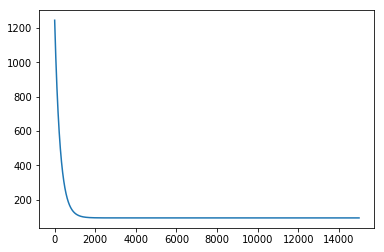

In [9]:
# Выведем график функции потерь 
plt.plot(losses), losses[-1]

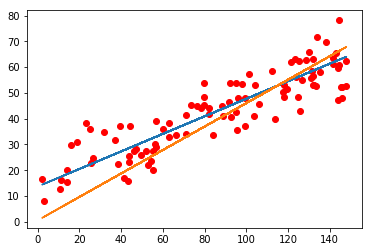

In [10]:
# Выведем данные, истинную зависимость и полученную нами
plt.scatter(X_train, y_train, c='r')
X_b = build_biased_X(X_train_column)
plt.plot(X_train, real_a * X_train + real_b)
plt.plot(X_train, np.squeeze(X_b @ W.T))
plt.show()

Градиентный спуск восстановил зависимость хуже, чем метод наименьших квадратов, это вызвано тем, что 
* данные не **нормализованы** (подробнее о нормализации в домашнем ноутбуке).
* в **методе наименьших квадратов** мы получали решение **аналитически**, поэтому оно гарантировано является наилучшим, в то время как градиентный спуск находит решение лишь приближенно. 

Возникает вопрос, зачем использовать **градиентный спуск**, если он хуже **аналитических** методов? Дело в том, что оптимизация большого количества весов в **нейронных сетях** слишком сложная задача, которая не может быть решена **аналитически**.

### Данные посложнее

Загрузим с помощью **pandas** реальные данные и попробуем найти параметры зависимости с помощью метода наименьших квадратов и градиентного спуска, как и в предыдущем примере (так как наш код универсален, нам просто нужно просто вызвать те же функции).

In [11]:
df = pd.read_csv("./data/data.csv")

In [12]:
# так как данные многомерные, мы не можем построить график, как в предыдущем примере, 
# чтобы увидеть зависимость глазами. Поэтому мы просто выведем первые строки таблицы.
df.head()

,Index,A1,A2,A3,A4,B
0,1,75,91,6,85,4815
1,2,6,48,48,48,234
2,3,5,60,24,40,160
3,4,74,48,8,86,4794
4,5,10,74,70,11,659


In [13]:
# разделим данные на признаки и значения
data, label = np.array(df)[:, 1:5], np.array(df)[:, 5]

### Решение с помощью линейной алгебры

In [14]:
# Используем функцию, написанную выше, чтобы найти W и b, с помощтю метода наименьших квадратов
W = solve_weights(data, label)
W

array([2030.27050104,    3.29211245,    6.54097099,   24.3858116 ,
         -7.47819654])

In [15]:
# Выведем значение функции ошибки, чтобы позже сравнить с результатом градиентного спуска
mse(predict(data, W), label)

3731984.960573224

### Решение с помощью градиентного спуска

In [16]:
# Найдем параметры с помощью градиентного спуска
# чтобы проследить за обучением, мы записываем значение функции ошибки на каждом шаге и после выводим
W, losses = grad_descent(data, label, 1e-9, 500)
W

array([ 0.22911295, 11.438982  , 11.83105959, 11.29573498,  6.95634032])

([<matplotlib.lines.Line2D at 0x20878c85908>], 5544263.065327726)

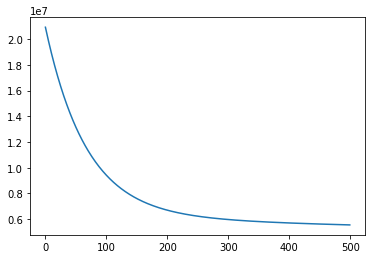

In [17]:
# Выведем график функции потерь 
plt.plot(losses), losses[-1]

In [18]:
# Выведем значение функции ошибки
mse(predict(data, W), label)

5542970.03307135

Как мы видим, **градиентный спуск** опять нашел значительно более плохое решение. Если нормализовать данные, то **градиентный спуск** будет сходиться лучше и разница будет не такой заметной. 

В домашнем задании вы научитесь нормализовывать данные. После этого вы можете вернуться в этот ноутбук и запустить градиентный спуск, предварительно использовав нормализацию.